In [1]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pandas as pd
from PIL import Image
import os
import copy

In [31]:
LABELS_Severity = {35: 0,
                   43: 0,
                   47: 1,
                   53: 1,
                   61: 2,
                   65: 2,
                   71: 2,
                   85: 2}

mean = (.1706)
std = (.2112)
normalize = transforms.Normalize(mean=mean, std=std)

transform_resnet = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.Grayscale(num_output_channels=3), # to compatible with resnet
    transforms.ToTensor(),
    normalize,
    transforms.ToPILImage()
])

transform_augment1 = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomRotation(degrees=(3, 3)),
    transforms.ColorJitter(contrast=(0.5, 0.5)),
    transforms.ToTensor(),
    normalize,
    transforms.ToPILImage()
])

transform_augment2 = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomRotation(degrees=(3, 3)),
    transforms.GaussianBlur(kernel_size=(5, 5)),
    transforms.ToTensor(),
    normalize,
    transforms.ToPILImage()
])



transform_augment3 = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=1),
    # transforms.GaussianBlur(kernel_size=(5, 5)),
    transforms.ColorJitter(contrast=(0.5, 0.5)),
    transforms.ToTensor(),
    normalize,
    transforms.ToPILImage()
])

transform_augment4 = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=1),
    transforms.GaussianBlur(kernel_size=(5, 5)),
    # transforms.ColorJitter(contrast=(0.5, 0.5)),
    transforms.ToTensor(),
    normalize,
    transforms.ToPILImage()
])

In [3]:

data_root = '/storage/home/hpaceice1/shared-classes/materials/ece8803fml/'
annot_train_prime = 'df_prime_train_features.csv'

annot = pd.read_csv(annot_train_prime)

label = [LABELS_Severity[drss] for drss in copy.deepcopy(annot['DRSS'].values)] 
path_list = annot['Volume_ID'].values
print(label[25])

0


/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-038/W32/OS/0.tif
0


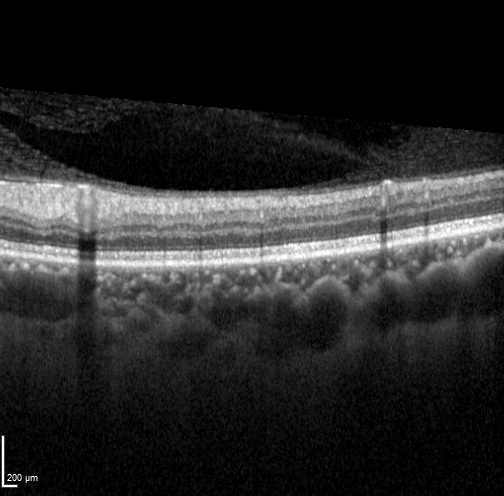

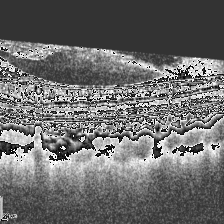

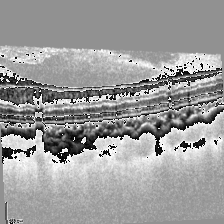

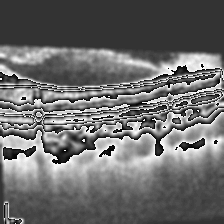

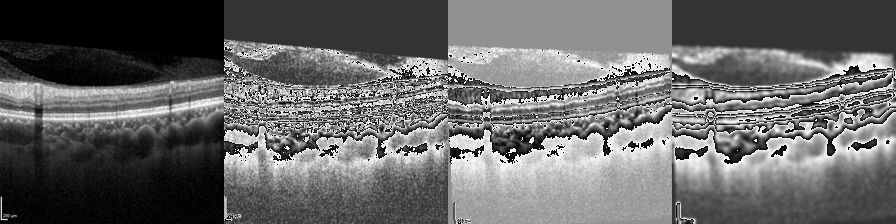

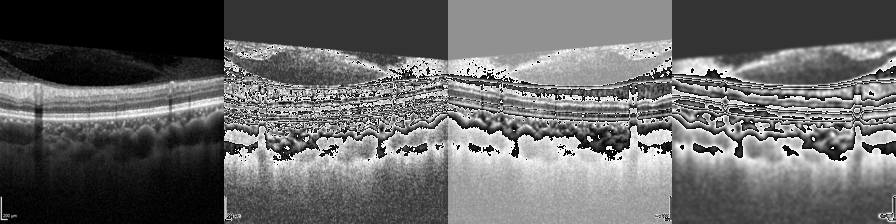

In [32]:
from PIL import Image, ImageOps

index = 25
folder_path = data_root + path_list[index]
for i  in range(0, 1):
    tif = str(i) + '.tif'
    png = str(i) + '.png'

    print(os.path.join(folder_path, tif))
    print(label[index])
    if (os.path.isfile(os.path.join(folder_path, tif))):
       img = Image.open(os.path.join(folder_path, tif)).convert("L")
    elif (os.path.isfile(os.path.join(folder_path, png))):
       img = Image.open(os.path.join(folder_path, png)).convert("L")
    
    display(img)
#     img = transforms.functional.crop(img, top=80, height = 330 , width = 504, left = 0)
    display(transform_resnet(img))
    display(transform_augment1(img))
    display(transform_augment2(img))
    
    new_width = 224
    original = img.resize((new_width, new_width))
   
    final_image = Image.new('RGB', (4*new_width, new_width))


    # paste the resized images into the final image
    final_image.paste(original, (0, 0))
    final_image.paste(transform_resnet(img), (new_width, 0))
    final_image.paste(transform_augment1(img), (new_width * 2, 0))
    final_image.paste(transform_augment2(img), (new_width * 3, 0))
    
    display(final_image)
    final_image.save("comparison_rotate.png")
    
    final_image2 = Image.new('RGB', (4*new_width, new_width))


    # paste the resized images into the final image
    final_image2.paste(original, (0, 0))
    final_image2.paste(transform_resnet(img), (new_width, 0))
    final_image2.paste(transform_augment3(img), (new_width * 2, 0))
    final_image2.paste(transform_augment4(img), (new_width * 3, 0))
    
    display(final_image2)
    final_image2.save("comparison_flip.png")

#     img = transform_augment(img)
#     display(img)

# index = 0
# folder_path = data_root + path_list[index]
# for i  in range(0, 1):
#     tif = str(i) + '.tif'
#     png = str(i) + '.png'

#     print(os.path.join(folder_path, tif))
#     print(label[index])
#     if (os.path.isfile(os.path.join(folder_path, tif))):
#        img = Image.open(os.path.join(folder_path, tif)).convert("L")
#     elif (os.path.isfile(os.path.join(folder_path, png))):
#        img = Image.open(os.path.join(folder_path, png)).convert("L")
    
#     display(transform_resnet(img))
#     img = transform_augment(img)
#     display(img)

# index = 2
# folder_path = data_root + path_list[index]  
# for i  in range(0, 1):
#     tif = str(i) + '.tif'
#     png = str(i) + '.png'

#     print(os.path.join(folder_path, tif))
#     print(label[index])
#     if (os.path.isfile(os.path.join(folder_path, tif))):
#        img = Image.open(os.path.join(folder_path, tif)).convert("L")
#     elif (os.path.isfile(os.path.join(folder_path, png))):
#        img = Image.open(os.path.join(folder_path, png)).convert("L")
    
#     display(transform_resnet(img))
#     img = transform_augment(img)
#     display(img)

In [ ]:
import dataloader as dataloader